## &#128205; Basic Setups

In [1]:
# Install pip packages in the current Jupyter kernel
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ 
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib==3.0.3
!{sys.executable} -m pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [3]:
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

'C:\\Users\\djyj1'

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [4]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## &#128205; 1. 데이터프레임 확인

In [5]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [6]:
# 데이터 shape 파악
df.shape

(72035, 18)

In [7]:
# 데이터 통계량 파악
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [8]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count') 

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [9]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


**결측치가 있다면 결측치에 대한 전처리를 거쳐줘야 한다.** 현 예시에서는 없으니, 패스!<br/> [결측치 제거 참고](https://eda-ai-lab.tistory.com/14)

In [10]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [11]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [12]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

## &#128205; 2. 데이터 도메인과 변수 이해
먼저, 가지고 있는 데이터에 대해서 이해하기 위해서는 어떤 변수들이 있는지 그리고 각 변수들의 의미와 풀고자하는 문제 간의 연관성 등을 파악해야 한다.
* 변수 이름
* 변수 타입 
* 변수들의 Segmentation
  >nyc_citibike 예시에서는. 이렇게 Segmentation 해볼 수 있다.
  >* 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
  >* 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)
  >* 대여바이크종류 변수 (bike_id)
  >* 유저정보 변수 (usertype, birth_year, gender,day_since_register)

* 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각해낸다.
    > * 평균적 trip_duration은 얼마일까?
    > * 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?
    > * 유저들 성별 분포는 어떨까?

* 서로 영향을 줄 변수들에 대한 기대 가설을 세워본다.
    >* 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?
    >* gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?
    > * start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?

* 실제 EDA 후 기대한 가설과 결과를 보고 해석한다.

## &#128205; 3. QUEST

### 3.1 

연령대(ex.10,20,30,40대) 변수와 함께 어떤 변수와의 관계를 보면 좋을지 기대 가설을 세우고, 적절한 방식으로 시각화 후 해석 보태 주세요.
연령은 25세, 26세~ 아닌 20대의 BIN 형태 연령대 (범주형 변수)로 묶어주세요.

[참고](https://nittaku.tistory.com/124)

In [37]:
cut_point = df["trip_duration"].quantile(0.90) 
df1=df[df['trip_duration'] < cut_point]
df['age']=(2019-df['birth_year'])
bins = [10, 20, 30, 40, 50, 60, 70,80,90]
df['binned'] = pd.cut(df['age'], bins)
df1=df[['trip_duration','binned']]
df1.sort_values(['binned'],ascending=False)

,trip_duration,binned
23694,1131,"(80.0, 90.0]"
21411,302,"(80.0, 90.0]"
20333,495,"(80.0, 90.0]"
27066,2321,"(80.0, 90.0]"
1011,93,"(80.0, 90.0]"
61793,697,"(80.0, 90.0]"
47556,1880,"(80.0, 90.0]"
8606,545,"(80.0, 90.0]"
64134,139,"(80.0, 90.0]"
7613,394,"(80.0, 90.0]"


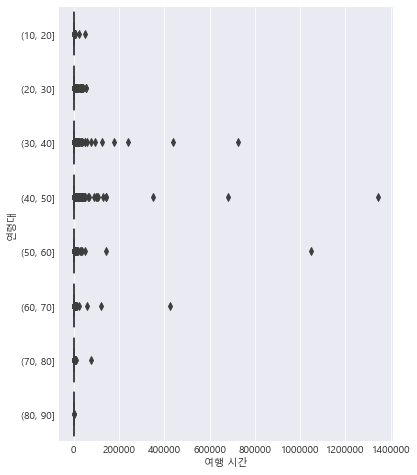

In [38]:
plt.figure(figsize=(6,8))
box=sns.boxplot(x='trip_duration',y='binned',data=df1)
box.set_xlabel("여행 시간")
box.set_ylabel("연령대")
plt.show()

**해석 보태기**
>주로 30대, 40대 50대의 여행 시간이 길었다고 볼 수 있다.

### 3.2

Bike_id (바이크 하나하나에 붙어있는 고유 아이디) 에 따른 trip_duration을 시각화해주세요. trip_duration은 평균(mean)이어도 좋고, 누적(sum)이어도 좋습니다. 해석 보태 주세요.
Groupby 함수 사용해주시면 편합니다.



In [40]:
cut_point = df["trip_duration"].quantile(0.99)
df_cut=df[df['trip_duration'] < cut_point]


In [43]:
df1=df_cut[['bike_id','trip_duration']]
df2=df1.groupby('bike_id',as_index=False).sum()
df3=df2.sort_values(['trip_duration'],ascending=False).head(10)
df3

,bike_id,trip_duration
8336,31210,27845
7377,30078,26729
8152,30998,26265
7268,29953,25575
8819,31973,25566
7982,30792,24665
9482,32754,23775
8523,31428,23692
9488,32760,22922
9949,33287,22518


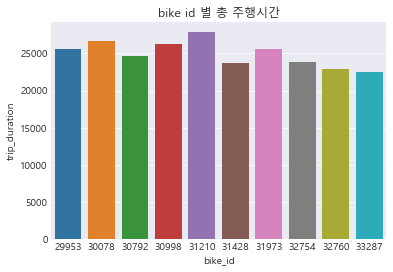

In [44]:
sns.barplot(x="bike_id", y="trip_duration", data=df3)
plt.title("bike id 별 총 주행시간")
plt.show()

**해석 보태기**
>

### 3.3

Bike_id, Trip_duration, + 한 가지 변수 더 추가해서 3개 이상 변수 시각화 방식으로 시각화 해주세요. 해석은 안 보태 주셔도 됩니다.

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['bike_id'], # x축
            df['start_hour'], # y축
            c=df['trip_duration'], # 색상
            s=10*df['trip_duration'], # 사이즈 
            # 10을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('바이크 아이디')
plt.xlabel('대여 시작 시간대')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

**해석 보태기**
>